<a href="https://colab.research.google.com/github/Sakib3602/ML/blob/main/Naive_Bayas_All_Types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# ===============================================================
# Imports and basic setup
# ===============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

plt.rcParams['figure.figsize'] = (7, 4)
sns.set(style='whitegrid')

## Part A – Gaussian Naive Bayes on Synthetic Numeric Data

In this part you will:
- Create a synthetic numeric dataset.
- Split into train and test sets.
- Train a Gaussian Naive Bayes model.
- Evaluate the model with accuracy and a confusion matrix.
- Experiment by changing the dataset difficulty.


In [45]:
# Create a synthetic numeric dataset for binary classification
X, y = make_classification(
    n_samples=600,
    n_features=6,
    n_informative=4,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=0.8,
    random_state=42
)

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)
print('Class distribution:', np.bincount(y))

Shape of X: (600, 6)
Shape of y: (600,)
Class distribution: [302 298]


In [46]:
# TODO 1: Split the data into training and test sets
# Use train_test_split with test_size=0.25 and random_state=42
# Save the result in X_train, X_test, y_train, y_test

# from sklearn.model_selection import train_test_split  # already imported above

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=40)  # TODO: write the correct function call

print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

Training set shape: (480, 6)
Test set shape: (120, 6)


In [47]:
# TODO 2: Create and train a GaussianNB model
# 1. Create an instance of GaussianNB
# 2. Fit it on the training data

# Example structure:
# gnb = GaussianNB()
# gnb.fit(X_train, y_train)

gnb = GaussianNB()
gnb.fit(X_train, y_train)         # TODO: create the model
...
# TODO: fit the model on X_train, y_train
print('Model training completed.')

Model training completed.


In [48]:
# TODO 3: Make predictions on the test set and compute accuracy
# 1. Use the trained model to predict on X_test
# 2. Compute accuracy_score using y_test and predictions

y_pred = gnb.predict(X_test)  # TODO: predictions for X_test
acc = accuracy_score(y_test,y_pred)     # TODO: compute accuracy_score
print('Accuracy of GaussianNB on synthetic data:', acc)

Accuracy of GaussianNB on synthetic data: 0.825


Confusion matrix:
 [[51 10]
 [11 48]]


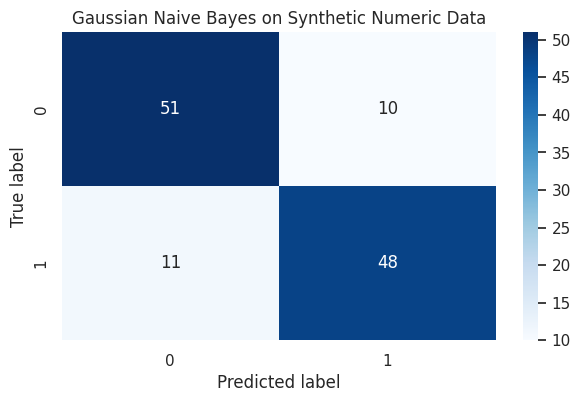

In [49]:
# TODO 4: Compute and plot the confusion matrix
# Steps:
# 1. Compute confusion_matrix using y_test and y_pred
# 2. Print the confusion matrix
# 3. Plot it with sns.heatmap

cm = confusion_matrix(y_test,y_pred)  # TODO: compute confusion matrix
print('Confusion matrix:\n', cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Gaussian Naive Bayes on Synthetic Numeric Data')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [50]:
# TODO 5: Print a classification report
# Use classification_report with y_test and y_pred

report =  classification_report(y_test,y_pred)  # TODO: call classification_report here
print(report)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        61
           1       0.83      0.81      0.82        59

    accuracy                           0.82       120
   macro avg       0.83      0.82      0.82       120
weighted avg       0.83      0.82      0.82       120



### Experiment: Change the Dataset Difficulty

- Recreate the dataset with a smaller `class_sep` value, such as `class_sep=0.8`.
- Repeat training and evaluation.
- Observe how accuracy and the confusion matrix change.

You can copy your previous code cells and adjust only the `make_classification` call.

## Part B – Naive Bayes for Text Classification (20 Newsgroups Subset)

In this part you will:
- Load a subset of the 20 Newsgroups dataset.
- Convert text into numeric features using `CountVectorizer`.
- Train a `MultinomialNB` classifier.
- Train a `BernoulliNB` classifier with binary features.
- Compare their performance.


In [51]:
# Fetch a subset of the 20 Newsgroups dataset
categories = ['comp.graphics', 'rec.sport.baseball', 'sci.med'] ## ADD another two more features
newsgroups = fetch_20newsgroups(
    subset='train',
    categories=categories,
    remove=('headers', 'footers', 'quotes'),
    shuffle=True,
    random_state=42
)

print('Number of documents:', len(newsgroups.data))
print('Target names:', newsgroups.target_names)

Number of documents: 1775
Target names: ['comp.graphics', 'rec.sport.baseball', 'sci.med']


In [52]:
# Put into a DataFrame for easier handling
df_text = pd.DataFrame({
    'text': newsgroups.data,
    'label': newsgroups.target
})
df_text.head()

,text,label
0,"\nThe FDA, I believe. Rules say no blood or b...",2
1,,2
2,It would be nice to think that individuals can...,2
3,"Ok all you trivia buffs, I have a good one for...",1
4,"Please , I need the starting address (pointer)...",0


In [53]:
# TODO 6: Split text data into train and test sets
# Use train_test_split on df_text['text'] and df_text['label']
# Suggested: test_size=0.25, random_state=42

X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(df_text['text'], df_text['label'], test_size=0.9,random_state=42)  # TODO

print('Train size:', X_train_text.shape[0])
print('Test size:', X_test_text.shape[0])

Train size: 177
Test size: 1598


In [54]:
# TODO 7: Convert text to count vectors for MultinomialNB
# Steps:
# 1. Create a CountVectorizer with stop_words='english' and max_features=3000
# 2. Fit on X_train_text and transform both train and test sets
#    to get X_train_counts and X_test_counts

vectorizer = CountVectorizer(stop_words='english', max_features=3000)  # TODO: create CountVectorizer
X_train_counts = vectorizer.fit_transform(X_train_text)  # TODO: fit_transform on X_train_text
X_test_counts = vectorizer.transform(X_test_text)   # TODO: transform on X_test_text

print('Shape of X_train_counts:', X_train_counts.shape)
print('Shape of X_test_counts:', X_test_counts.shape)

Shape of X_train_counts: (177, 3000)
Shape of X_test_counts: (1598, 3000)


In [55]:
# TODO 8: Train a MultinomialNB model on the count vectors
# 1. Create a MultinomialNB instance
# 2. Fit it on X_train_counts and y_train_text

mnb = MultinomialNB()  # TODO: create model
...
# TODO: fit the model
mnb.fit(X_train_counts, y_train_text)
print('MultinomialNB model trained on text data.')

MultinomialNB model trained on text data.


Accuracy of MultinomialNB on 20 Newsgroups subset: 0.886107634543179
Confusion matrix:
 [[456  47  19]
 [ 14 503  17]
 [ 28  57 457]]


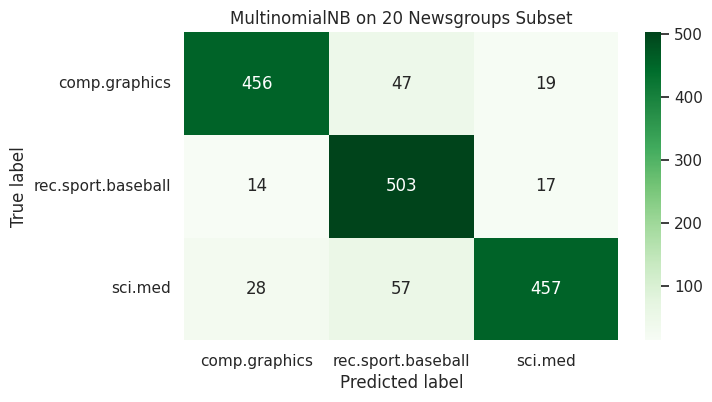

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       522
           1       0.83      0.94      0.88       534
           2       0.93      0.84      0.88       542

    accuracy                           0.89      1598
   macro avg       0.89      0.89      0.89      1598
weighted avg       0.89      0.89      0.89      1598



In [56]:
# TODO 9: Evaluate MultinomialNB
# 1. Predict on X_test_counts
# 2. Compute accuracy
# 3. Compute and print a confusion matrix
# 4. Print a classification report with target_names=newsgroups.target_names

y_pred_text = mnb.predict(X_test_counts)  # TODO: predictions
acc_text = accuracy_score(y_test_text, y_pred_text)     # TODO: accuracy
print('Accuracy of MultinomialNB on 20 Newsgroups subset:', acc_text)

cm_text = confusion_matrix(y_test_text, y_pred_text)      # TODO: confusion matrix
print('Confusion matrix:\n', cm_text)

sns.heatmap(cm_text, annot=True, fmt='d', cmap='Greens',
            xticklabels=newsgroups.target_names,
            yticklabels=newsgroups.target_names)
plt.title('MultinomialNB on 20 Newsgroups Subset')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

report_text = classification_report(y_test_text, y_pred_text)   # TODO: classification_report
print(report_text)

### 2.1 Practice: Bernoulli Naive Bayes with Binary Features

Now repeat a similar process using `BernoulliNB`:
- Use `CountVectorizer` with `binary=True`.
- Train a `BernoulliNB` model.
- Compare its accuracy and confusion matrix with `MultinomialNB`.


In [62]:
# TODO 10: Create binary bag of words features
# 1. Create a new CountVectorizer with binary=True
# 2. Fit on X_train_text and transform train and test sets

vectorizer_bin = CountVectorizer(binary=True) # TODO: CountVectorizer with binary=True
X_train_bin = vectorizer_bin.fit_transform(X_train_text)    # TODO: fit_transform
X_test_bin = vectorizer_bin.transform(X_test_text)      # TODO: transform
print('Shape of X_train_bin:', X_train_bin.shape)
print('Shape of X_test_bin:', X_test_bin.shape)

Shape of X_train_bin: (177, 6778)
Shape of X_test_bin: (1598, 6778)


Accuracy of BernoulliNB on 20 Newsgroups subset: 0.630162703379224
Confusion matrix:
 [[349 169   4]
 [  3 531   0]
 [ 27 388 127]]


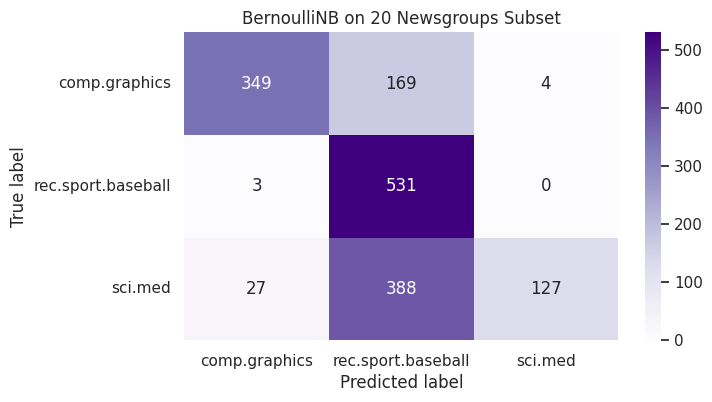

              precision    recall  f1-score   support

           0       0.92      0.67      0.77       522
           1       0.49      0.99      0.65       534
           2       0.97      0.23      0.38       542

    accuracy                           0.63      1598
   macro avg       0.79      0.63      0.60      1598
weighted avg       0.79      0.63      0.60      1598



In [67]:
# TODO 11: Train and evaluate BernoulliNB
# Steps:
# 1. Create a BernoulliNB model
# 2. Fit it on X_train_bin and y_train_text
# 3. Predict on X_test_bin
# 4. Compute accuracy, confusion matrix, and classification report
# 5. Compare the results with MultinomialNB

bnb = BernoulliNB()  # TODO: create BernoulliNB model
bnb.fit(X_train_bin,y_train_text)
# TODO: fit the model
y_pred_bin = bnb.predict(X_test_bin)  # TODO: predictions
acc_bin = accuracy_score(y_test_text, y_pred_bin)     # TODO: accuracy
print('Accuracy of BernoulliNB on 20 Newsgroups subset:', acc_bin)

cm_bin = confusion_matrix(y_test_text, y_pred_bin)       # TODO: confusion matrix
print('Confusion matrix:\n', cm_bin)

sns.heatmap(cm_bin, annot=True, fmt='d', cmap='Purples',
            xticklabels=newsgroups.target_names,
            yticklabels=newsgroups.target_names)
plt.title('BernoulliNB on 20 Newsgroups Subset')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

report_bin = classification_report(y_test_text, y_pred_bin)   # TODO: classification_report
print(report_bin)